# Web Scraping Prep
## by Sung Pil Kim 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from selenium import webdriver
import time
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from matplotlib.dates import DateFormatter, DayLocator

In [2]:
df = pd.read_csv('rawbtc.csv', parse_dates = True)

In [3]:
df_1 = df[['date','PriceUSD']]

In [4]:
df_1.head()
df_1.set_index('date')

,PriceUSD
date,
2009-01-03,NaN
2009-01-04,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2021-02-21,57500.716110
2021-02-22,53952.153339
2021-02-23,48560.489035


In [6]:
df_1.index = df['date']

In [7]:
df_2 = df_1.loc['2017-08-01':'2021-02-25']

In [8]:
df_2.rename(columns = {'PriceUSD':'price'}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [663]:
len(df_2)

1305

In [646]:
df_2_trend = df_1.loc['2010-07-18':'2021-02-25']

In [647]:
df_2_trend.rename(columns = {'PriceUSD':'price'}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


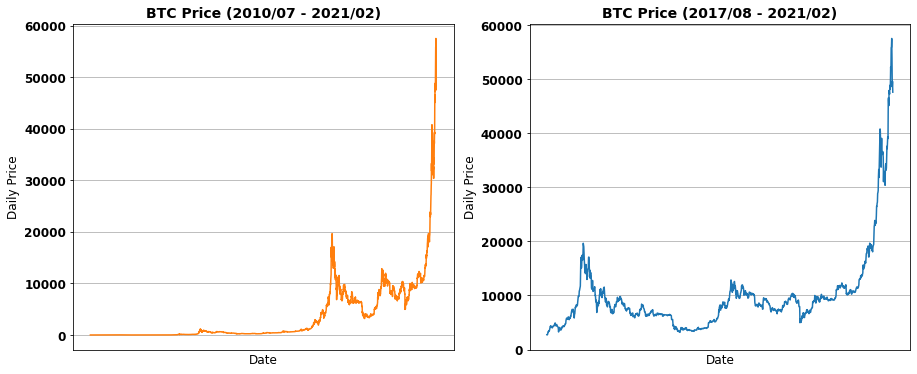

In [661]:
plt.rc('font', size=12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(df_2_trend.index, df_2_trend['price'], color='tab:orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Price')
ax1.set_title('BTC Price (2010/07 - 2021/02)', size = 14, fontweight = 'bold')
ax1.grid(True)
ax1.set_xticks([])
ax2.plot(df_2.index, df_2['price'], color='tab:blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Price')
ax2.set_title('BTC Price (2017/08 - 2021/02)', size = 14, fontweight = 'bold')
ax2.grid(True)
ax2.set_xticks([])
plt.show()
fig.savefig('BTC Price.jpeg')

In [11]:
df_2['btc_pc'] = df_2['price'].pct_change()

<ipython-input-11-122aa7d1134f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['btc_pc'] = df_2['price'].pct_change()


In [12]:
df_2['btc_pc'].max()

0.21727646407897838

In [13]:
df_2['btc_pc'].min()

-0.3753495151221996

In [595]:
df_2['btc_pc'].mean()

0.003109474268019737

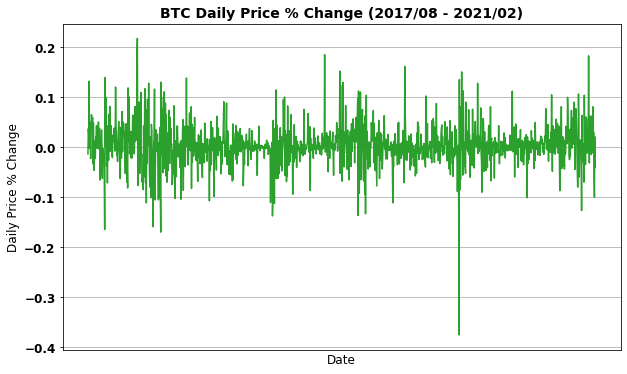

In [662]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_2.index, df_2['btc_pc'], color='tab:green')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Price % Change')
ax.set_title('BTC Daily Price % Change (2017/08 - 2021/02)', size = 14, fontweight = 'bold')
ax.grid(True)
ax.set_xticks([])
plt.show()
fig.savefig('BTC Daily Price % Change.jpeg')

In [412]:
df_3 = df_2.loc['2017-08-02':'2021-02-25']

In [16]:
btc_pc = np.array(df_3['btc_pc'])

In [19]:
df_3['abs_btc_pc'] = abs(df_3['btc_pc'])

df_3

<ipython-input-19-cbd96d40760a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['abs_btc_pc'] = abs(df_3['btc_pc'])


,date,price,btc_pc,abs_btc_pc
date,,,,
2017-08-02,2017-08-02,2690.145672,-0.013655,0.013655
2017-08-03,2017-08-03,2789.746312,0.037024,0.037024
2017-08-04,2017-08-04,2860.272843,0.025281,0.025281
2017-08-05,2017-08-05,3237.423363,0.131858,0.131858
2017-08-06,2017-08-06,3230.116709,-0.002257,0.002257
...,...,...,...,...
2021-02-21,2021-02-21,57500.716110,0.029338,0.029338
2021-02-22,2021-02-22,53952.153339,-0.061713,0.061713
2021-02-23,2021-02-23,48560.489035,-0.099934,0.099934


In [592]:
percentile_75 = np.quantile(abs(df_3['btc_pc']), 0.75)

In [593]:
new_dates = []
test_pc = df_3[['abs_btc_pc', 'date']]

for i in range(len(test_pc.abs_btc_pc)):
    if test_pc.abs_btc_pc[i] >= percentile_75:
        new_dates.append(test_pc.date[i])

In [23]:
test_pc = df_3[['btc_pc', 'date']]

In [24]:
test_pc.loc['2017-08-18']

btc_pc    -0.0464219
date      2017-08-18
Name: 2017-08-18, dtype: object

In [664]:
len(new_dates)

326

In [65]:
import datetime

search_date = []

for i in range(len(new_dates)):
    search_date.append(datetime.datetime.strptime(new_dates[i], '%Y-%m-%d').strftime('%m/%d/%y'))

In [67]:
search_date

['08/05/17',
 '08/07/17',
 '08/11/17',
 '08/12/17',
 '08/13/17',
 '08/14/17',
 '08/16/17',
 '08/18/17',
 '08/24/17',
 '08/29/17',
 '09/02/17',
 '09/04/17',
 '09/08/17',
 '09/13/17',
 '09/14/17',
 '09/15/17',
 '09/18/17',
 '09/21/17',
 '09/23/17',
 '09/25/17',
 '09/27/17',
 '09/30/17',
 '10/12/17',
 '10/13/17',
 '10/20/17',
 '10/24/17',
 '10/29/17',
 '10/31/17',
 '11/01/17',
 '11/02/17',
 '11/06/17',
 '11/08/17',
 '11/09/17',
 '11/10/17',
 '11/11/17',
 '11/12/17',
 '11/13/17',
 '11/15/17',
 '11/16/17',
 '11/25/17',
 '11/26/17',
 '11/27/17',
 '12/01/17',
 '12/06/17',
 '12/07/17',
 '12/08/17',
 '12/09/17',
 '12/11/17',
 '12/13/17',
 '12/15/17',
 '12/16/17',
 '12/19/17',
 '12/20/17',
 '12/21/17',
 '12/22/17',
 '12/23/17',
 '12/24/17',
 '12/26/17',
 '12/28/17',
 '12/30/17',
 '12/31/17',
 '01/02/18',
 '01/05/18',
 '01/07/18',
 '01/08/18',
 '01/11/18',
 '01/12/18',
 '01/16/18',
 '01/20/18',
 '01/21/18',
 '01/22/18',
 '01/29/18',
 '01/30/18',
 '02/01/18',
 '02/04/18',
 '02/05/18',
 '02/06/18',

In [89]:
begin = search_date[::2]
end = search_date[1::2]

In [93]:
len(begin)

163

In [92]:
len(end)

163

In [370]:
child_num = list(range(1,12))
full_text = ''
for i in range(1,len(child_num)):
    results = driver.find_element_by_xpath('//*[@id="rso"]/div[{}]/g-card/div/div/div[2]/a/div/div[2]/div[2]'.format(i)).text
    full_text += results
news_title.append(full_text)

In [ ]:
from selenium import webdriver
import time
from webdriver_manager.chrome import ChromeDriverManager
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup


options = webdriver.ChromeOptions()
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option('excludeSwitches', ['enable-automation'])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(ChromeDriverManager().install(), options = options)

driver.get('https://www.google.com/search?q=cryptocurrency')

time.sleep(4)

xpath = '''//*[@id="hdtb-msb"]/div[1]/div/div[2]/a'''
element_sel_news = driver.find_element_by_xpath(xpath).click()

time.sleep(2)

news_title = []
for i in tqdm_notebook(range(len(search_date))):
    driver.get(driver.current_url)
    
    xpath = '''//*[@id="hdtb-tls"]'''
    element_get_tool = driver.find_element_by_xpath(xpath).click()

    time.sleep(2)

    xpath = '''//*[@id="hdtbMenus"]/span[1]/g-popup/div[1]/div/div'''
    element_get_recent = driver.find_element_by_xpath(xpath).click()

    time.sleep(2)

    xpath = '''//*[@id="lb"]/div/g-menu/g-menu-item[8]/div/div/span'''
    element_get_custom = driver.find_element_by_xpath(xpath).click()

    time.sleep(2)

    element = driver.find_element_by_id('OouJcb')
    element.send_keys(search_date[i])

    time.sleep(4)

    element = driver.find_element_by_id('rzG2be')
    element.send_keys(search_date[i+1])

    xpath = '''//*[@id="T3kYXe"]/g-button'''
    element_get_tool = driver.find_element_by_xpath(xpath).click()

    time.sleep(2)
    
    child_num = list(range(1,12))
    full_text = ''
    for j in range(1,len(child_num)):
        try:
            results = driver.find_element_by_xpath('//*[@id="rso"]/div[{}]/g-card/div/div/div[2]/a/div/div[2]/div[2]'.format(j)).text
        except:
            results = driver.find_element_by_xpath('//*[@id="rso"]/div[{}]/g-card/div/div/div[2]/a/div/div[2]'.format(j)).text
        full_text += results + ""
    news_title_2.append(full_text)
    
    time.sleep(3)
    
    driver.back()
    
    time.sleep(2)

In [468]:
df_3['abs_btc_pc'] = abs(df_3['btc_pc'])

In [462]:
new_date_df = pd.DataFrame(new_dates, columns = ['date'])
new_date_df

,date
0,2017-08-05
1,2017-08-07
2,2017-08-11
3,2017-08-12
4,2017-08-13
...,...
321,2021-02-17
322,2021-02-19
323,2021-02-22
324,2021-02-23


In [415]:
df_3 = df_3.reset_index()

In [419]:
df_3 = df_3.drop('index', axis = 1)

In [556]:
qualified_data = pd.merge(new_date_df, df_3, how = 'inner', on = 'date')

In [582]:
qualified_data

,date,price,btc_pc,abs_btc_pc,abs_pc_avg
0,2017-08-05,3237.423363,0.131858,0.131858,NaN
1,2017-08-07,3392.562419,0.050291,0.050291,0.091075
2,2017-08-11,3660.520537,0.065024,0.065024,0.057657
3,2017-08-12,3871.082406,0.057522,0.057522,0.061273
4,2017-08-13,4063.801053,0.049784,0.049784,0.053653
...,...,...,...,...,...
321,2021-02-17,52224.939114,0.062770,0.062770,0.062606
322,2021-02-19,55820.504404,0.080744,0.080744,0.071757
323,2021-02-22,53952.153339,-0.061713,0.061713,0.071229
324,2021-02-23,48560.489035,-0.099934,0.099934,0.080824


In [549]:
begin_date = new_dates
begin_date.pop()
begin_date, new_dates

(['2017-08-05',
  '2017-08-07',
  '2017-08-11',
  '2017-08-12',
  '2017-08-13',
  '2017-08-14',
  '2017-08-16',
  '2017-08-18',
  '2017-08-24',
  '2017-08-29',
  '2017-09-02',
  '2017-09-04',
  '2017-09-08',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-18',
  '2017-09-21',
  '2017-09-23',
  '2017-09-25',
  '2017-09-27',
  '2017-09-30',
  '2017-10-12',
  '2017-10-13',
  '2017-10-20',
  '2017-10-24',
  '2017-10-29',
  '2017-10-31',
  '2017-11-01',
  '2017-11-02',
  '2017-11-06',
  '2017-11-08',
  '2017-11-09',
  '2017-11-10',
  '2017-11-11',
  '2017-11-12',
  '2017-11-13',
  '2017-11-15',
  '2017-11-16',
  '2017-11-25',
  '2017-11-26',
  '2017-11-27',
  '2017-12-01',
  '2017-12-06',
  '2017-12-07',
  '2017-12-08',
  '2017-12-09',
  '2017-12-11',
  '2017-12-13',
  '2017-12-15',
  '2017-12-16',
  '2017-12-19',
  '2017-12-20',
  '2017-12-21',
  '2017-12-22',
  '2017-12-23',
  '2017-12-24',
  '2017-12-26',
  '2017-12-28',
  '2017-12-30',
  '2017-12-31',
  '2018-01-02',
  '2018-

In [531]:
end_date = []
i = 0
while i <= 324:
    y = new_dates[i+1]
    end_date.append(y)
    i += 1

In [557]:
qualified_data['abs_pc_avg'] = qualified_data['abs_btc_pc'].rolling(2).mean()

In [583]:
qualified_data['btc_pc_avg'] = qualified_data['btc_pc'].rolling(2).mean()

In [570]:
range_ = list(range(1,327))
range_
range_type = []

for i in range(1,len(range_)):
    x = 'range_{}'.format(i)
    range_type.append(x)
range_type

['range_1',
 'range_2',
 'range_3',
 'range_4',
 'range_5',
 'range_6',
 'range_7',
 'range_8',
 'range_9',
 'range_10',
 'range_11',
 'range_12',
 'range_13',
 'range_14',
 'range_15',
 'range_16',
 'range_17',
 'range_18',
 'range_19',
 'range_20',
 'range_21',
 'range_22',
 'range_23',
 'range_24',
 'range_25',
 'range_26',
 'range_27',
 'range_28',
 'range_29',
 'range_30',
 'range_31',
 'range_32',
 'range_33',
 'range_34',
 'range_35',
 'range_36',
 'range_37',
 'range_38',
 'range_39',
 'range_40',
 'range_41',
 'range_42',
 'range_43',
 'range_44',
 'range_45',
 'range_46',
 'range_47',
 'range_48',
 'range_49',
 'range_50',
 'range_51',
 'range_52',
 'range_53',
 'range_54',
 'range_55',
 'range_56',
 'range_57',
 'range_58',
 'range_59',
 'range_60',
 'range_61',
 'range_62',
 'range_63',
 'range_64',
 'range_65',
 'range_66',
 'range_67',
 'range_68',
 'range_69',
 'range_70',
 'range_71',
 'range_72',
 'range_73',
 'range_74',
 'range_75',
 'range_76',
 'range_77',
 'range_

In [571]:
temp_df = pd.DataFrame(list(zip(range_type, begin_date, end_date)), columns = ['range_num','begin_date', 'end_date'])

In [572]:
temp_df

,range_num,begin_date,end_date
0,range_1,2017-08-05,2017-08-07
1,range_2,2017-08-07,2017-08-11
2,range_3,2017-08-11,2017-08-12
3,range_4,2017-08-12,2017-08-13
4,range_5,2017-08-13,2017-08-14
...,...,...,...
320,range_321,2021-02-11,2021-02-17
321,range_322,2021-02-17,2021-02-19
322,range_323,2021-02-19,2021-02-22
323,range_324,2021-02-22,2021-02-23


In [584]:
sel_qualified_data = qualified_data[['date', 'btc_pc_avg']]

In [585]:
qualified_data_2 = pd.merge(temp_df, sel_qualified_data, left_on = 'end_date', right_on = 'date')

In [586]:
qualified_data_2

,range_num,begin_date,end_date,date,btc_pc_avg
0,range_1,2017-08-05,2017-08-07,2017-08-07,0.091075
1,range_2,2017-08-07,2017-08-11,2017-08-11,0.057657
2,range_3,2017-08-11,2017-08-12,2017-08-12,0.061273
3,range_4,2017-08-12,2017-08-13,2017-08-13,0.053653
4,range_5,2017-08-13,2017-08-14,2017-08-14,0.054520
...,...,...,...,...,...
320,range_321,2021-02-11,2021-02-17,2021-02-17,0.062606
321,range_322,2021-02-17,2021-02-19,2021-02-19,0.071757
322,range_323,2021-02-19,2021-02-22,2021-02-22,0.009515
323,range_324,2021-02-22,2021-02-23,2021-02-23,-0.080824


In [587]:
qualified_data_2  = qualified_data_2.drop('date', axis = 1)

In [588]:
qualified_data_2

,range_num,begin_date,end_date,btc_pc_avg
0,range_1,2017-08-05,2017-08-07,0.091075
1,range_2,2017-08-07,2017-08-11,0.057657
2,range_3,2017-08-11,2017-08-12,0.061273
3,range_4,2017-08-12,2017-08-13,0.053653
4,range_5,2017-08-13,2017-08-14,0.054520
...,...,...,...,...
320,range_321,2021-02-11,2021-02-17,0.062606
321,range_322,2021-02-17,2021-02-19,0.071757
322,range_323,2021-02-19,2021-02-22,0.009515
323,range_324,2021-02-22,2021-02-23,-0.080824


In [589]:
qualified_data_2['news_title'] = news_title

In [590]:
qualified_data_2

,range_num,begin_date,end_date,btc_pc_avg,news_title
0,range_1,2017-08-05,2017-08-07,0.091075,Cryptocurrency Market Tops $117B as Bitcoin Pr...
1,range_2,2017-08-07,2017-08-11,0.057657,On The Breadth Of Cryptocurrency: How Many Dif...
2,range_3,2017-08-11,2017-08-12,0.061273,Cryptocurrency surge stirs Bitcoin bubble fear...
3,range_4,2017-08-12,2017-08-13,0.053653,"Nvidia CEO talks cryptocurrency, AI, and the l..."
4,range_5,2017-08-13,2017-08-14,0.054520,David Sacks: Cryptocurrency fulfills the 'orig...
...,...,...,...,...,...
320,range_321,2021-02-11,2021-02-17,0.062606,Bitcoin (BTC USD) Cryptocurrency Price Jumps t...
321,range_322,2021-02-17,2021-02-19,0.071757,North Korean hackers charged in massive crypto...
322,range_323,2021-02-19,2021-02-22,0.009515,How to Buy Cryptocurrency?Bitcoin hits $1 tril...
323,range_324,2021-02-22,2021-02-23,-0.080824,Cryptocurrency Price Check: Bitcoin Falls Belo...


In [591]:
qualified_data_2.to_csv('news_title_data_2.csv', index = False)